# Procesamiento Digital de Imagenes/ Cesar Germán Castellanos 
# Yessica Alejandra Gomez Rivera 

In [ ]:
from __future__ import division             # forces floating point division 
import numpy as np                          # Numerical Python 
import matplotlib.pyplot as plt             # Python plotting
from PIL import Image                       # Python Imaging Library
from numpy.fft import fft2, fftshift, ifft2 # Python DFT

from ipywidgets import interact

# Show plots in the notebook (don't use it in Python scripts)
%matplotlib inline 

# Espectro de una imagen sinusoidal en el eje horizontal

In [ ]:
!pip install PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':"1wCqrRHbLxcZoqA181y5qjvLZ-AKYqtUp"})   # replace the id with id of file you want to access
downloaded.GetContentFile('P1010128.JPG')

In [ ]:
downloaded = drive.CreateFile({'id':"1DfphNA7Rc_F5kJWBQb5TGos-P05YYpd4"})   # replace the id with id of file you want to access
downloaded.GetContentFile('vertical.jpg')

In [ ]:
downloaded = drive.CreateFile({'id':"1Q4ERoU3T4jbkX0gEnDwxq1xjrX7P7ztz"})   # replace the id with id of file you want to access
downloaded.GetContentFile('MarPDI.jpg')

In [ ]:
downloaded = drive.CreateFile({'id':"157aY_Q-8IPZW0EfC4DXKZrusbtk7wE3E"})   # replace the id with id of file you want to access
downloaded.GetContentFile('GataPDI.jpg')

In [ ]:
downloaded = drive.CreateFile({'id':"17PvfDmWyyOpHUsfmu8UgY_ysnnZAw8XR"})   # replace the id with id of file you want to access
downloaded.GetContentFile('LeopardoPDI.jpg')

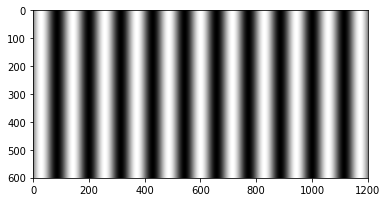

In [ ]:
hW, hH = 600, 300
hFreq = 10.5
# Mesh on the square [0,1)x[0,1)
x = np.linspace( 0, 2*hW/(2*hW +1), 2*hW+1)     # columns (Width)
y = np.linspace( 0, 2*hH/(2*hH +1), 2*hH+1)     # rows (Height)

[X,Y] = np.meshgrid(x,y)
A = np.sin(hFreq*2*np.pi*X)

plt.imshow(A, cmap = 'gray');
H,W = np.shape(A)

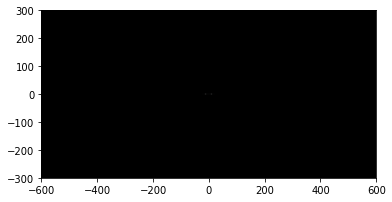

In [ ]:
F = fft2(A)/(W*H)                          
F = fftshift(F)
P = np.abs(F)                            
plt.imshow(P, extent = [-hW,hW,-hH,hH]);

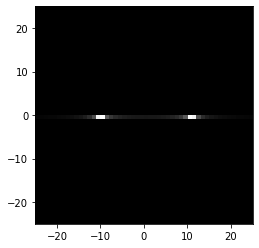

In [ ]:
plt.imshow(P[hH-25:hH+25,hW-25:hW+25], extent=[-25,25,-25,25]);

# Espectro de imagen oscilante en ambos ejes

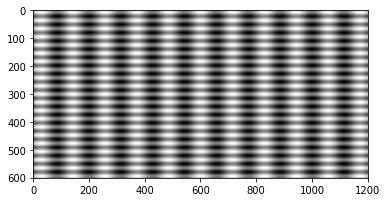

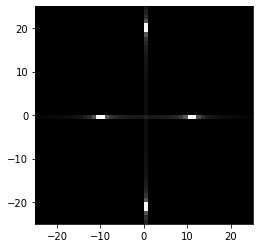

In [ ]:
hFreq = 10.5
vFreq = 20.5

A1 = np.sin(hFreq*2*np.pi*X) + np.sin(vFreq*2*np.pi*Y)

plt.figure()
plt.imshow(A1, cmap = 'gray');

F1 = fft2(A1)/(W*H)                          
F1 = fftshift(F1)
P1 = np.abs(F1)

plt.figure()
plt.imshow(P1[hH-25:hH+25,hW-25:hW+25], extent=[-25,25,-25,25]);

# Espectro de imagen oscilante con rotación

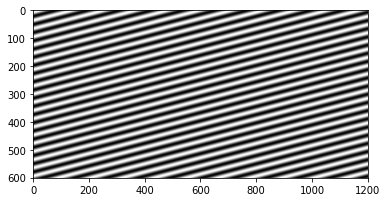

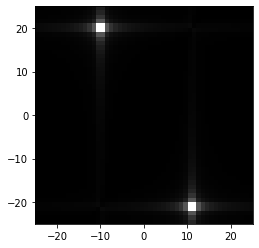

In [ ]:
hFreq = 10.5
vFreq = 20.5

A2 = np.sin(hFreq*2*np.pi*X + vFreq*2*np.pi*Y)

plt.figure()
plt.imshow(A2, cmap = 'gray');

F2 = fft2(A2)/(W*H)                          
F2 = fftshift(F2)
P2 = np.abs(F2)

plt.figure()
plt.imshow(P2[hH-25:hH+25,hW-25:hW+25], extent=[-25,25,-25,25]);

# Espectro de fotografía con patrones periódicos

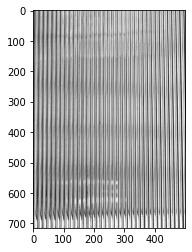

In [ ]:
I = Image.open("vertical.jpg")
I = I.convert('L')                     # 'L' for gray scale mode
A3 = np.asarray(I, dtype = np.float32)  # Image class instance, I1, to float32 Numpy array, a

H,W = np.shape(A3)
hW = np.fix(0.5*W)
hH = np.fix(0.5*H)

plt.imshow(A3, cmap = 'gray');

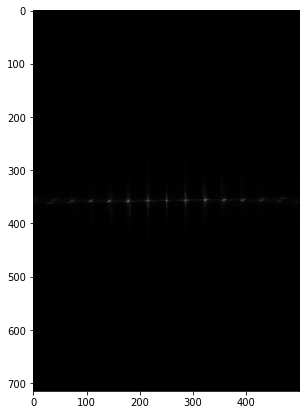

In [ ]:
F3 = fft2(A3)/(W*H)                          
F3 = fftshift(F3)
P3 = np.abs(F3)

r = 100
plt.figure(figsize=(18,7))
plt.imshow(np.log(1+P3));

# Patrones periódicos con ruido y rotación

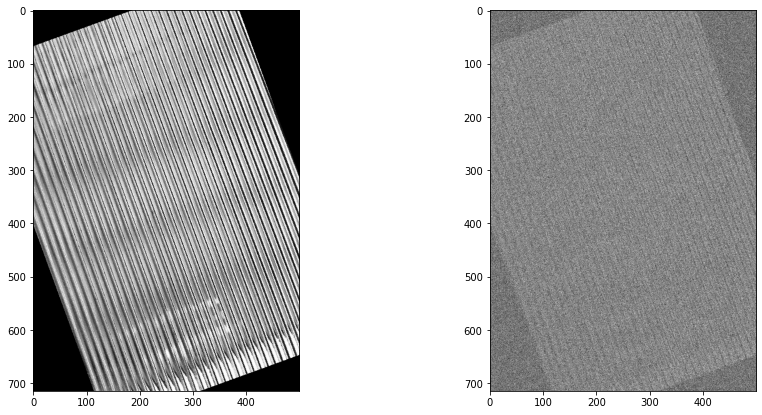

In [ ]:
from PIL import Image
rotated     = I.rotate(20)
Array = np.asarray(rotated, dtype = np.float32)


nf=250
noisyArray=nf*np.random.randn(715,500) + Array 



plt.figure(figsize=(15,7))
plt.subplot(121)
plt.imshow(Array, cmap = 'gray');

plt.subplot(122)
plt.imshow(noisyArray, cmap = 'gray');

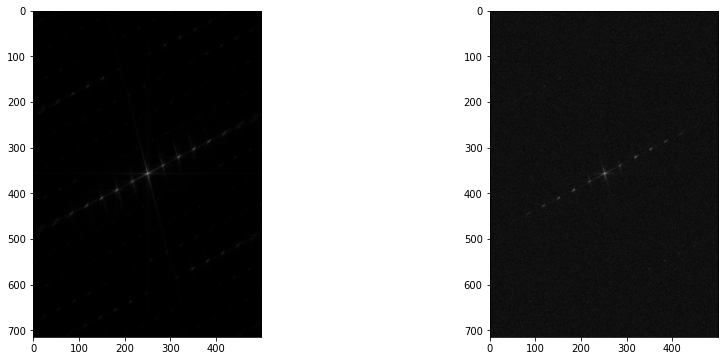

In [ ]:
F3 = fft2(Array)/(W*H)                          
F3 = fftshift(F3)
P3 = np.abs(F3)

F3_n = fft2(noisyArray)/(W*H)                          
F3_n = fftshift(F3_n)
P3_n = np.abs(F3_n)


r = 100
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.imshow(np.log(1+P3))

plt.subplot(122)
plt.imshow(np.log(1+P3_n))

# Transformada Wavelet

Esta Transformada es eficiente para el análisis local de señales no estacionarias y de rápida transitoriedad y, al igual que la Transformada de Fourier con Ventana, mapea la señal en una representación de tiempo-escala. El aspecto temporal de las señales es preservado.Transformada Wavelet provee análisis de multiresolución con ventanas dilatadas. El análisis de las frecuencias de mayor rango se realiza usando ventanas angostas y el análisis de las frecuencias de menor rango se hace utilizando ventanas anchas.

# Aplicaciones 

# Detección de bordes

Los bordes de una imagen digital se pueden definir como transiciones entre dos regiones de
niveles de gris significativamente distintos. Suministran una valiosa información sobre las
fronteras de los objetos y puede ser utilizada para segmentar la imagen, reconocer objetos, etc.
La mayoría de las técnicas para detectar bordes emplean operadores locales basados en distintas
aproximaciones discretas de la primera y segunda derivada de los niveles de grises de la imagen. 


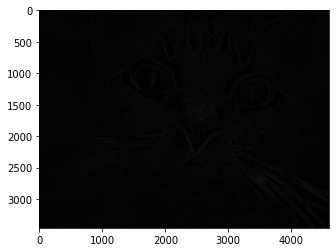

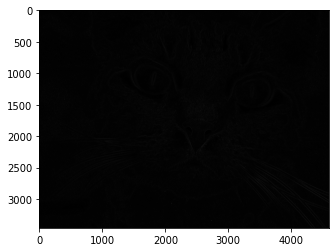

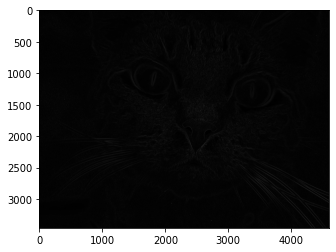

In [ ]:
from skimage import io
from skimage import filters
from skimage.color import rgb2gray
import matplotlib.pyplot as plt


imagen = io.imread("P1010128.JPG")
imagen_g = rgb2gray(imagen)

# Filtros: sobel, roberts, prewitt
filtros = [filters.sobel, filters.roberts, filters.prewitt]

for filtro in filtros:
    # Aplicamos cada uno de los filtros
    img_fil = filtro(imagen_g)
    
    # Mostramos los resultados 
    plt.imshow(img_fil)
    plt.show()

# Wavelet denoising

Eliminación de ruido de ondas
La eliminación de ruido de ondas se basa en la representación de ondas de la imagen. El ruido gaussiano tiende a estar representado por valores pequeños en el dominio de ondículas y puede eliminarse estableciendo coeficientes por debajo de un umbral dado en cero (umbral estricto) o reduciendo todos los coeficientes hacia cero en una cantidad determinada (umbral suave).

En este ejemplo, ilustramos dos métodos diferentes para la selección del umbral del coeficiente de ondícula: BayesShrink y VisuShrink.

***VisuShrink:***
El enfoque VisuShrink emplea un único umbral universal para todos los coeficientes de detalle de ondículas. Este umbral está diseñado para eliminar el ruido gaussiano aditivo con alta probabilidad, lo que tiende a dar como resultado una apariencia de imagen demasiado suave. Al especificar un sigma que sea más pequeño que la desviación estándar del ruido real, se puede obtener un resultado visualmente más agradable.


***BayesShrink:*** es un enfoque adaptativo para el umbral suave de ondículas donde se estima un umbral único para cada subbanda de ondículas. Esto generalmente resulta en una mejora con respecto a lo que se puede obtener con un solo umbral.

Estimated Gaussian noise standard deviation = 0.11548304419889456


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


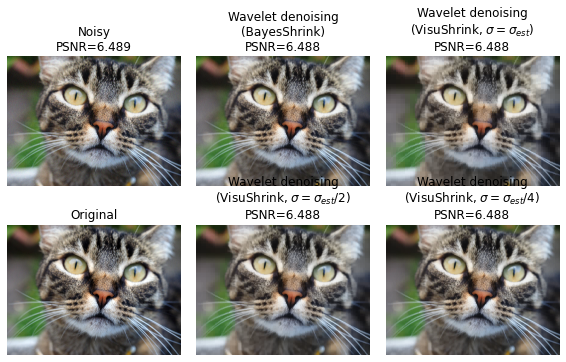

In [ ]:
import matplotlib.pyplot as plt

from skimage.restoration import (denoise_wavelet, estimate_sigma)
from skimage import data, img_as_float
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio

original = io.imread("P1010128.JPG") 
#original = img_as_float(data.chelsea()[100:250, 50:300])

sigma = 0.12
noisy = random_noise(original, var=sigma**2)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(8, 5),
                       sharex=True, sharey=True)

plt.gray()

# Estimate the average noise standard deviation across color channels.
sigma_est = estimate_sigma(noisy, multichannel=True, average_sigmas=True)
# Due to clipping in random_noise, the estimate will be a bit smaller than the
# specified sigma.
print(f"Estimated Gaussian noise standard deviation = {sigma_est}")

im_bayes = denoise_wavelet(noisy, multichannel=True, convert2ycbcr=True,
                           method='BayesShrink', mode='soft',
                           rescale_sigma=True)
im_visushrink = denoise_wavelet(noisy, multichannel=True, convert2ycbcr=True,
                                method='VisuShrink', mode='soft',
                                sigma=sigma_est, rescale_sigma=True)

# VisuShrink is designed to eliminate noise with high probability, but this
# results in a visually over-smooth appearance.  Repeat, specifying a reduction
# in the threshold by factors of 2 and 4.
im_visushrink2 = denoise_wavelet(noisy, multichannel=True, convert2ycbcr=True,
                                 method='VisuShrink', mode='soft',
                                 sigma=sigma_est/2, rescale_sigma=True)
im_visushrink4 = denoise_wavelet(noisy, multichannel=True, convert2ycbcr=True,
                                 method='VisuShrink', mode='soft',
                                 sigma=sigma_est/4, rescale_sigma=True)

# Compute PSNR as an indication of image quality
psnr_noisy = peak_signal_noise_ratio(original, noisy)
psnr_bayes = peak_signal_noise_ratio(original, im_bayes)
psnr_visushrink = peak_signal_noise_ratio(original, im_visushrink)
psnr_visushrink2 = peak_signal_noise_ratio(original, im_visushrink2)
psnr_visushrink4 = peak_signal_noise_ratio(original, im_visushrink4)

ax[0, 0].imshow(noisy)
ax[0, 0].axis('off')
ax[0, 0].set_title('Noisy\nPSNR={:0.4g}'.format(psnr_noisy))
ax[0, 1].imshow(im_bayes)
ax[0, 1].axis('off')
ax[0, 1].set_title(
    'Wavelet denoising\n(BayesShrink)\nPSNR={:0.4g}'.format(psnr_bayes))
ax[0, 2].imshow(im_visushrink)
ax[0, 2].axis('off')
ax[0, 2].set_title(
    'Wavelet denoising\n(VisuShrink, $\\sigma=\\sigma_{est}$)\n'
     'PSNR=%0.4g' % psnr_visushrink)
ax[1, 0].imshow(original)
ax[1, 0].axis('off')
ax[1, 0].set_title('Original')
ax[1, 1].imshow(im_visushrink2)
ax[1, 1].axis('off')
ax[1, 1].set_title(
    'Wavelet denoising\n(VisuShrink, $\\sigma=\\sigma_{est}/2$)\n'
     'PSNR=%0.4g' % psnr_visushrink2)
ax[1, 2].imshow(im_visushrink4)
ax[1, 2].axis('off')
ax[1, 2].set_title(
    'Wavelet denoising\n(VisuShrink, $\\sigma=\\sigma_{est}/4$)\n'
     'PSNR=%0.4g' % psnr_visushrink4)
fig.tight_layout()

plt.show()

# Histograma 

Un histograma es una función unidimensional de valores de píxeles que representa la distribución de los valores de píxeles en una ventana. Un histograma típico se caracteriza por la presencia de picos, o modos, que representan los valores de píxeles hallados en las características de la ventana dominante.

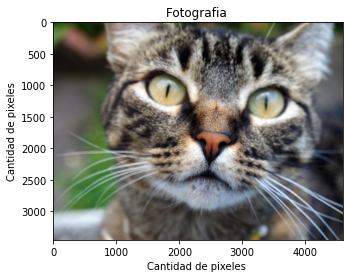

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 
import cv2
import numpy as np
from matplotlib import pyplot as plt


I= Image.open("P1010128.JPG")
plt.imshow(I)
plt.title("Fotografia ")
plt.xlabel("Cantidad de pixeles ")  
plt.ylabel("Cantidad de pixeles") 
plt.show()

# Primera forma utilizando Matplotlib

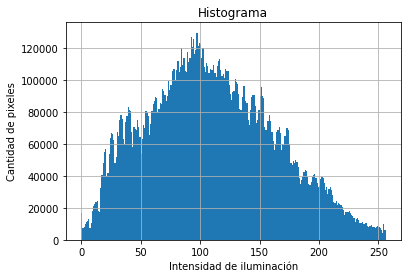

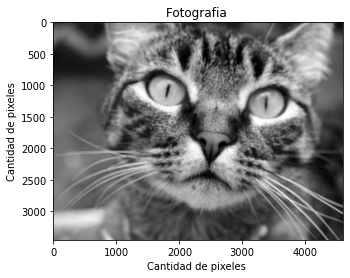

In [ ]:
img = cv2.imread('P1010128.JPG',0)
plt.hist(img.ravel(),256,[0,256]); 
plt.grid()
plt.title("Histograma")
plt.xlabel("Intensidad de iluminación")  
plt.ylabel("Cantidad de pixeles") 
plt.show()
plt.imshow(img)
plt.title("Fotografia ")
plt.xlabel("Cantidad de pixeles ")  
plt.ylabel("Cantidad de pixeles") 
plt.show()

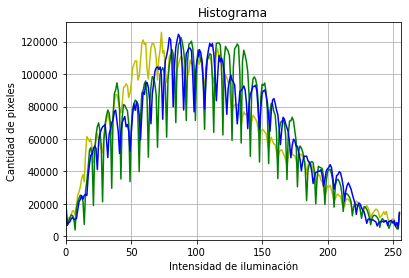

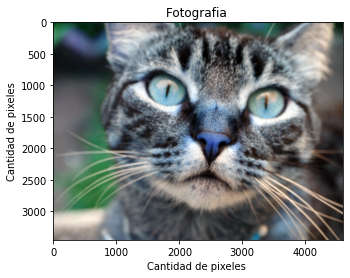

In [ ]:
img = cv2.imread('P1010128.JPG')
color = ('y','g','b')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
    plt.grid()
    plt.title("Histograma")
    plt.xlabel("Intensidad de iluminación")  
    plt.ylabel("Cantidad de pixeles")  
plt.show()
plt.imshow(img)
plt.title("Fotografia ")
plt.xlabel("Cantidad de pixeles ")  
plt.ylabel("Cantidad de pixeles") 
plt.show()

Del histograma anterior se puede deducir los colores amarillo, verdes y azules están en áreas bien definidas de la imagen.

# 2. Utilizando OpenCV

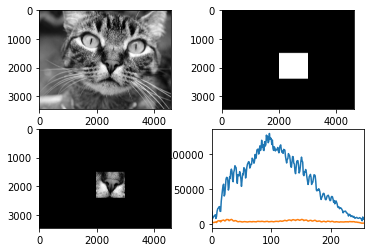

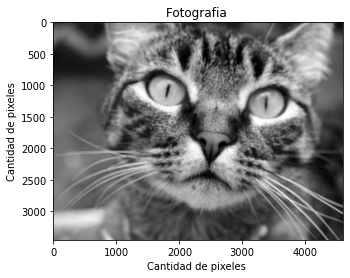

In [ ]:
img = cv2.imread('P1010128.JPG',0)
# crear máscara
mask = np.zeros(img.shape[:2], np.uint8)
mask[1500:2400, 2000:3000] = 255  #las coordenadas, vertical horizontal de la parte que queremos analizar
masked_img = cv2.bitwise_and(img,img,mask = mask)
 
# Calcular el histograma con máscara y sin máscara
# Fijar el tercer argumento como "mask"
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
 
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
 
plt.show()
plt.imshow(img)
plt.title("Fotografia ")
plt.xlabel("Cantidad de pixeles ")  
plt.ylabel("Cantidad de pixeles") 
plt.show()

En el anterior lo que se realizo fue crear una mascara negra para todos los pixeles que no queremos analizar, y una mascara en blanco para los pixeles que queremos analizar y se le saca su histograma.

#Disminución de resolución en una imagen

La resolución de una imagen es el número de píxeles por pulgada que contiene (1 pulgada = 2,54 centímetros). Ésta se expresa en PPP (puntos por pulgada en español) o DPI (dots per inch en inglés).Cuantos más píxeles (o puntos) haya por pulgada más información contendrá la imagen (más precisa).

Lo que hacemos es reducir el tamaño de la imagen, en el caso de la fotografia original, su resolución es 3456 pixelesx 4608 pixeles y la cambiamos a 256 pixeles x 256 pixeles. 

(256, 256)


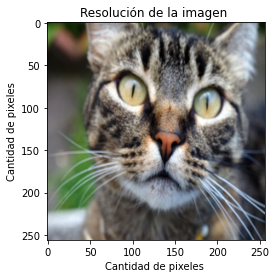

In [ ]:
img = Image.open("P1010128.JPG")
new_img = img.resize((256,256))
new_img.save('P1010128-256x256.png','png')
I1= Image.open('P1010128-256x256.png')
plt.imshow(I1)
plt.title("Resolución de la imagen ")
plt.xlabel("Cantidad de pixeles ")  
plt.ylabel("Cantidad de pixeles") 
img = cv2.imread("P1010128-256x256.png")
print(img.shape[0:2])

(3456, 4608)


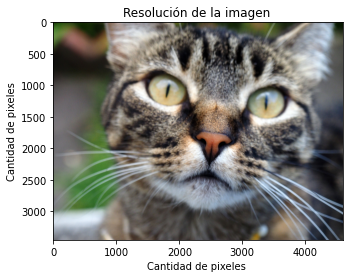

In [ ]:
I2= Image.open('P1010128.JPG')
plt.title("Resolución de la imagen ")
plt.xlabel("Cantidad de pixeles ")  
plt.ylabel("Cantidad de pixeles") 
plt.imshow(I2)
img = cv2.imread("P1010128.JPG")
print(img.shape[0:2])


In [ ]:
import os
print(os.stat('P1010128.JPG').st_size)
print(os.stat('P1010128-256x256.png').st_size)

7135352
137894


# Contraste de la imagen 

El contraste en fotografía es el efecto que se produce al destacar un elemento sobre los demás en una misma imagen. También podemos definirlo como la diferencia entre el tono más negro y blanco en una imagen. Cuanto mayor sea esta diferencia tonal, mayor contraste tendrá la imagen.

# Tipos de contraste: de color, tonal y conceptual

**Contraste de color:**
El contraste de color es el que se consigue al combinar distintos tipos de tonalidades de color en una misma fotografía. Por ejemplo mediante el uso de colores complementarios. En estas ruedas podemos ver según las mezclas de colores en el círculo cromático RGB (izquierda) y la rueda de colores tradicional (derecha) que los colores diametralmente opuestos son los denominados “complementarios”.
**Contraste tonal:**
El contraste tonal es el que se produce al jugar con las luces, las sombras y toda la tonalidad de grises en una imagen. Por ejemplo, en las horas centrales del día el contraste tonal es muchísimo más pronunciado y es una buena oportunidad para sacarle el mayor provecho a este tipo de contraste en nuestras fotografías.

**Contraste conceptual:**
El contraste conceptual hace referencia al que se produce cuando comparamos elementos con distintos tamaños o formas. Incluso edades si estamos haciendo fotografía de retrato.

/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


(3456, 4608)


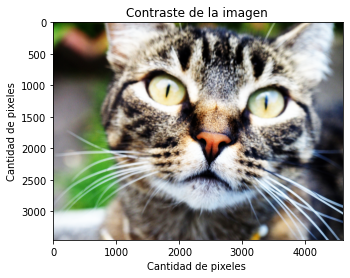

(3456, 4608)


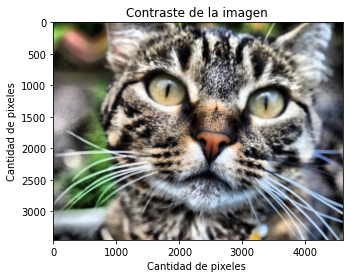

In [ ]:
from skimage import exposure
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

imagen = io.imread('P1010128.JPG')

# Estiramiento de contraste
p2, p98 = np.percentile(imagen, (2,98))
img_rescale = exposure.rescale_intensity(imagen, in_range=(p2,p98))

# Ecualización
img_eq = exposure.equalize_hist(imagen)

# Ecualización adaptiva
img_adapteq = exposure.equalize_adapthist(imagen, clip_limit=0.03)

for eq in (img_eq, img_adapteq):
  
    plt.title("Contraste de la imagen ")
    plt.xlabel("Cantidad de pixeles ")  
    plt.ylabel("Cantidad de pixeles") 
    print(imagen.shape[0:2])
    plt.imshow(eq)
    plt.show()

# Compresión 

(3456, 4608) ppi img original
7135352 peso original
1521422 peso comprimido


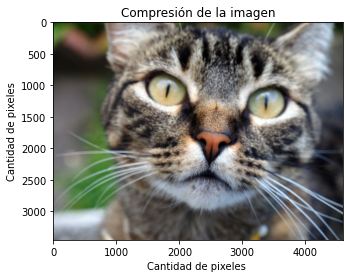

In [ ]:
# Open the image
im = Image.open("P1010128.JPG")
# Now save it
im.save("P1010128_compressed.jpg", format="JPEG", quality=80)
img = cv2.imread("P1010128_compressed.jpg")
print(img.shape[0:2], "ppi img original")
# Open the image
im = Image.open("P1010128.JPG")
# Now save it
im.save("P1010128_compressed.jpg", format="JPEG", quality=80)
I2= Image.open("P1010128_compressed.jpg")
plt.imshow(I2)
plt.title("Compresión de la imagen")
plt.xlabel("Cantidad de pixeles ")  
plt.ylabel("Cantidad de pixeles") 

print(os.stat('P1010128.JPG').st_size,"peso original")
print(os.stat('P1010128_compressed.jpg').st_size,"peso comprimido")
plt.show ()

Segmentación: pasar de pixeles a objetos, existen dos formas, la primera es por agrupación de vecindario y por transformaciones 

# Detección de bordes Skimage, Slic, Watershed

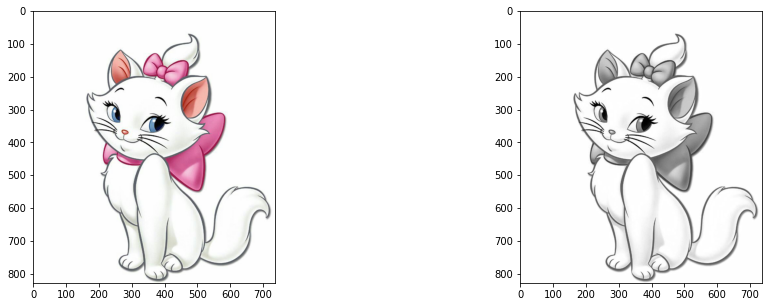

In [ ]:
monza=Image.open("GataPDI.jpg")
image=monza.convert("L")
image=np.array(image)
plt.figure(figsize=(16,5))
plt.subplot(121)
plt.imshow(monza)
plt.subplot(122)
plt.imshow(image)
plt.show()

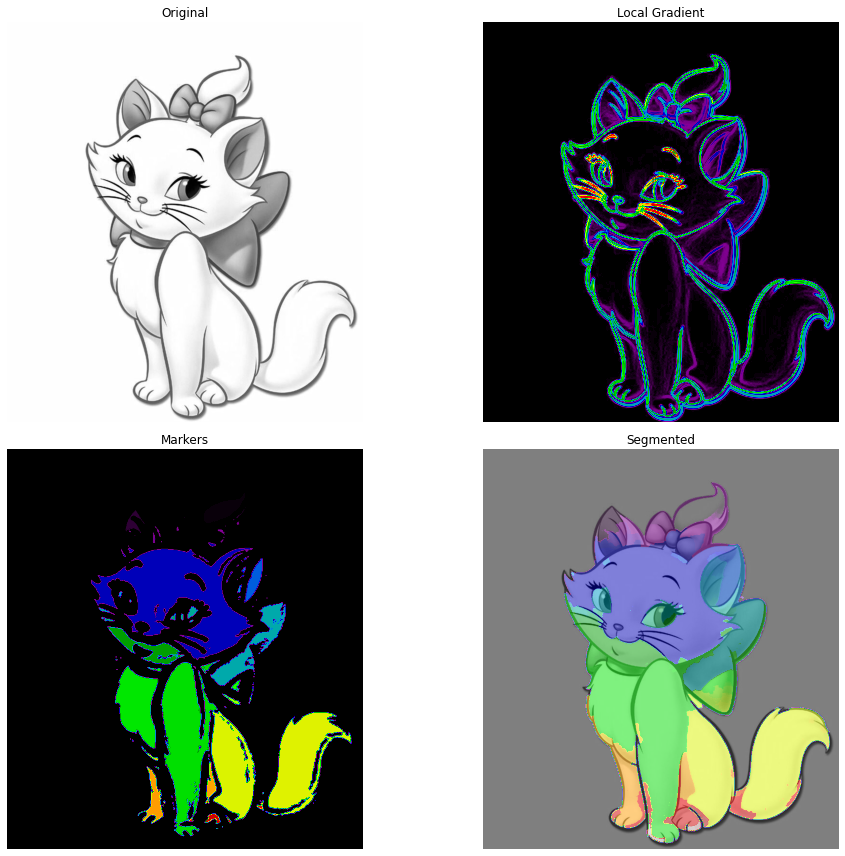

In [ ]:
from skimage.morphology import disk

from skimage import data
from skimage.filters import rank
from skimage.util import img_as_ubyte
from scipy import ndimage as ndi
from skimage.segmentation import watershed


# denoise image
denoised = rank.median(image, disk(2))

# find continuous region (low gradient -
# where less than 10 for this image) --> markers
# disk(5) is used here to get a more smooth image
markers = rank.gradient(denoised, disk(4)) < 10
markers = ndi.label(markers)[0]

# local gradient (disk(2) is used to keep edges thin)
gradient = rank.gradient(denoised, disk(2))

# process the watershed
labels = watershed(gradient, markers)

# display results
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12),
                         sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title("Original")

ax[1].imshow(gradient, cmap=plt.cm.nipy_spectral)
ax[1].set_title("Local Gradient")

ax[2].imshow(markers, cmap=plt.cm.nipy_spectral)
ax[2].set_title("Markers")

ax[3].imshow(image, cmap=plt.cm.gray)
ax[3].imshow(labels, cmap=plt.cm.nipy_spectral, alpha=.5 )
ax[3].set_title("Segmented")

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()

# Filtro Gaussiano 

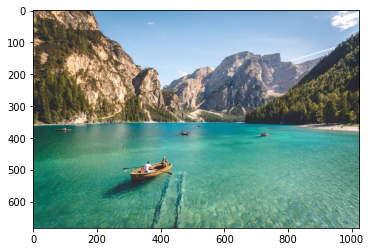

In [ ]:
from PIL import Image
I= Image.open("MarPDI.jpg")
plt.imshow(I)

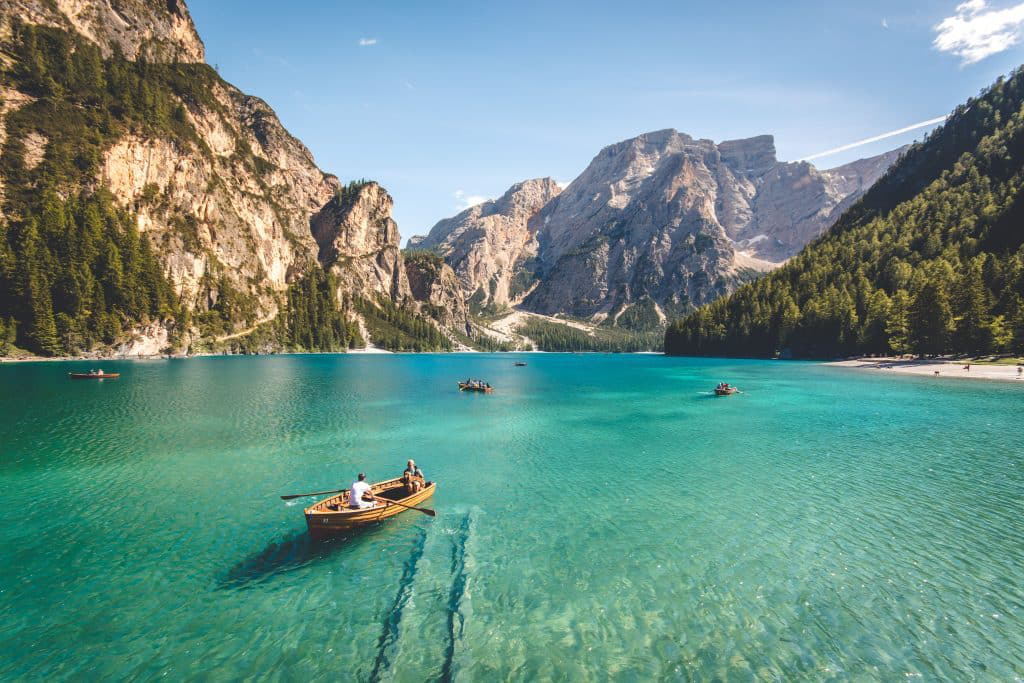

In [ ]:
Mar=Image.open("MarPDI.jpg")
Mar_L=Mar.convert("L")
Mar

In [ ]:
from skimage.filters import gaussian
array_Mar=np.array(Mar)
@interact(sigma=(0.1 , 10 , 0.1))
def gauss_filter(sigma=1 ):  
  fltr_Mar=gaussian(array_Mar, sigma=sigma)
  plt.figure(figsize=(18,12))
  plt.subplot(121)
  plt.imshow(Mar)  
  plt.subplot(122)
  plt.imshow(fltr_Mar)
  plt.show()
 

interactive(children=(FloatSlider(value=1.0, description='sigma', max=10.0, min=0.1), Output()), _dom_classes=…

# Opacidad 

In [ ]:
 mz=Image.open("MarPDI.jpg")
@interact(n_bits=(1,8,1))
def cuantizar(n_bits=8):  
  #mz=mz.convert('L')
  mz_q=mz.quantize(2**n_bits)
  plt.figure(figsize=(20,8))

  plt.subplot(121)
  plt.title("Original (8bits)")
  plt.imshow(mz)
  plt.subplot(122)
  title=str(n_bits)+" bits"
  plt.title(title)
  plt.imshow(mz_q)
  #print("Relación señal ruido: ",peak_signal_noise_ratio(np.array(mz),np.array(mz_q)))

interactive(children=(IntSlider(value=8, description='n_bits', max=8, min=1), Output()), _dom_classes=('widget…

# Slic

In [ ]:
from skimage.segmentation import slic
from skimage.data import astronaut
img = Image.open("MarPDI.jpg")
#Al aumentar el parámetro de compacidad se obtienen más regiones cuadradas
@interact(compactness=(1 , 100 , 1))
def gauss_filter(compactness=1 ):  
  segments = slic(img, n_segments=100, compactness=compactness)
  plt.figure(figsize=(18,12))
  plt.subplot(121)
  plt.imshow(Mar)  
  plt.subplot(122)
  plt.imshow(segments)
  plt.show()
@interact(n_segments=(1 , 100 , 1))
def gauss_filter(n_segments=1 ):  
  segments = slic(img, n_segments=n_segments, compactness=100)
  plt.figure(figsize=(18,12))
  plt.subplot(121)
  plt.imshow(Mar)  
  plt.subplot(122)
  plt.imshow(segments)
  plt.show()

interactive(children=(IntSlider(value=1, description='compactness', min=1), Output()), _dom_classes=('widget-i…

interactive(children=(IntSlider(value=1, description='n_segments', min=1), Output()), _dom_classes=('widget-in…

#Fourier como codificador de texturas

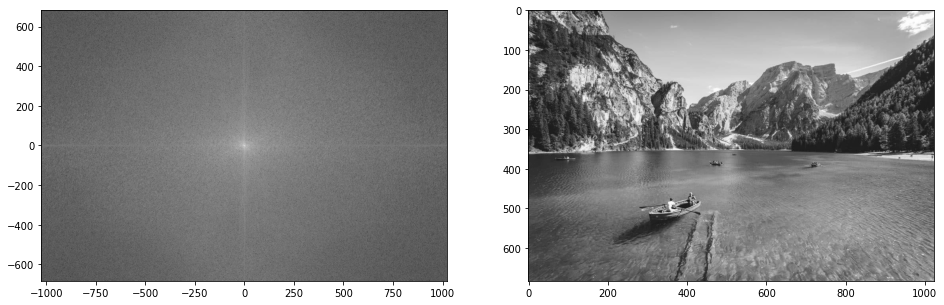

In [ ]:
m1=Image.open("MarPDI.jpg")
img=np.array(m1.convert('L'))
H,W = np.shape(img)
F = fft2(img)/(W*H)                          
F = fftshift(F)
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.imshow(np.log(np.abs(F))  , extent = [-W,W,-H,H])
F[0:200 , 0:200]=0
new=ifft2(F)
plt.subplot(122)
plt.imshow(np.abs(new))

#Función de convolución


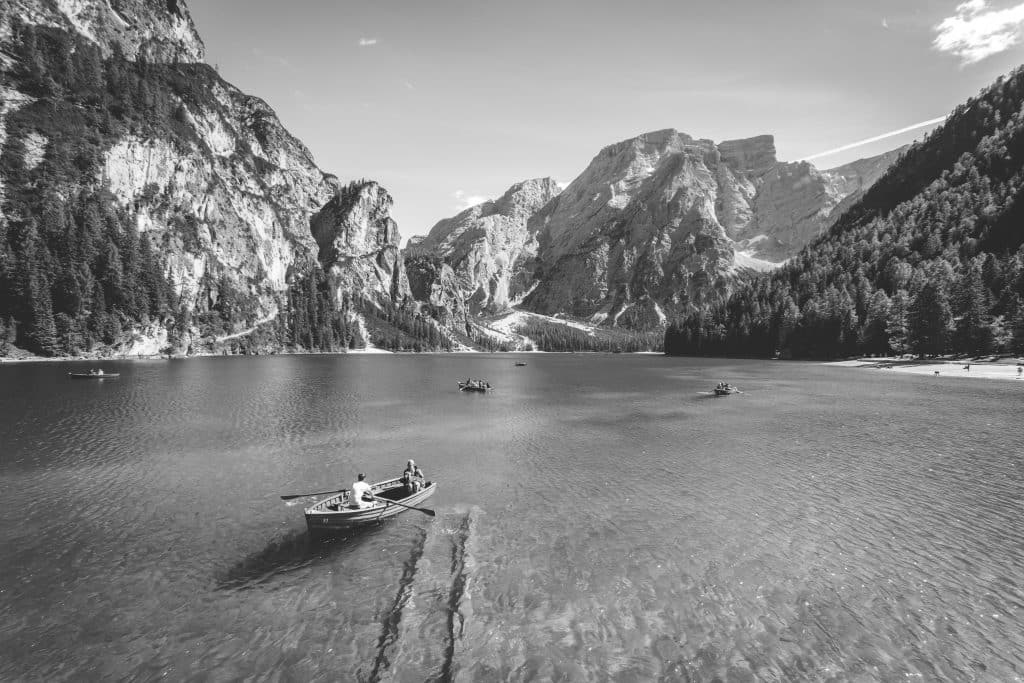

In [ ]:
Mar_L=Mar.convert("L")
Mar_L

In [ ]:
def convolucion(Imagen, Kernel,n):  
  Kernel = np.flipud(np.fliplr(Kernel))  
  output = np.zeros_like(Imagen)
  
  image_padded = np.zeros((Imagen.shape[0] + n-1, Imagen.shape[1] + n-1))
  image_padded[1:-1, 1:-1] = Imagen

  
  for x in range(Imagen.shape[1]):
      for y in range(Imagen.shape[0]):          
          output[y, x]=(Kernel * image_padded[y: y+n, x: x+n]).sum()
  return output

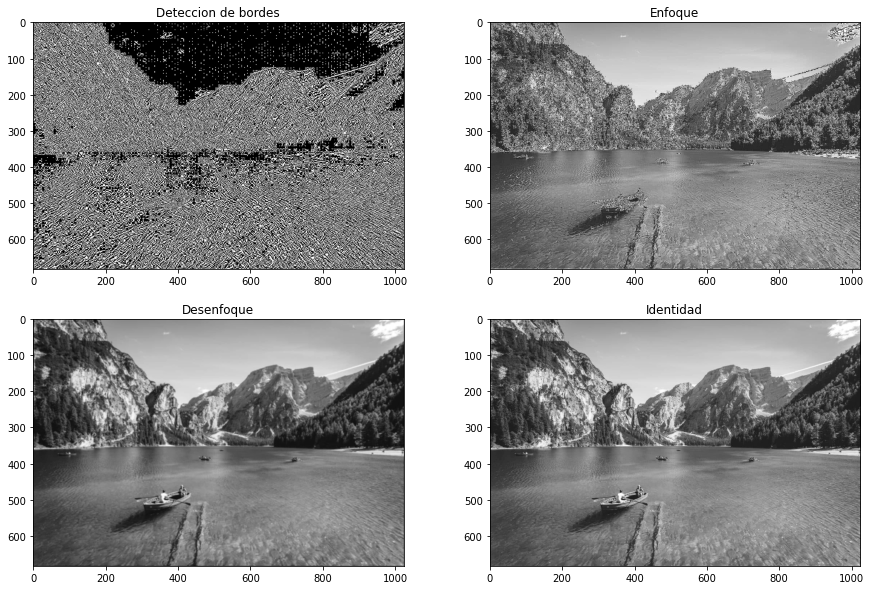